<center>
    
  # DSP: Underlying Concepts

    
## William Eustace M0WJE
## m0+rsgb2020@wje.io
</center>


# Allergen notice/Disclaimer/Apology
### This talk contains mathematics (with explanation) but is guaranteed to be free of practical advice.
1. The description I wrote back when I had to come up with a title was somewhat misleading and was further altered...
1. Roughly A level mathematics knowledge is advisable: DSP is by nature not a maths-free zone. I aim to explain everything thoroughly as I go.
2. This talk aims to give you the underlying background to signal processing: why does it work? It will **not** be a tutorial to build a working system, and will not give you most of the tools necessary to do so.
3. That said: if you want to build something that works in this field, it will help to understand **why** it works!


# Today's Objectives
1. Time domain, Frequency domain, and how to go from one to the other.
2. Nyquist's Theorem (very briefly!)
3. Impulse Responses & Convolution.

# What is a signal?

* For our purposes: a time-varying function $f(t)$.
* Analogue or digital?
* Discrete or continuous?





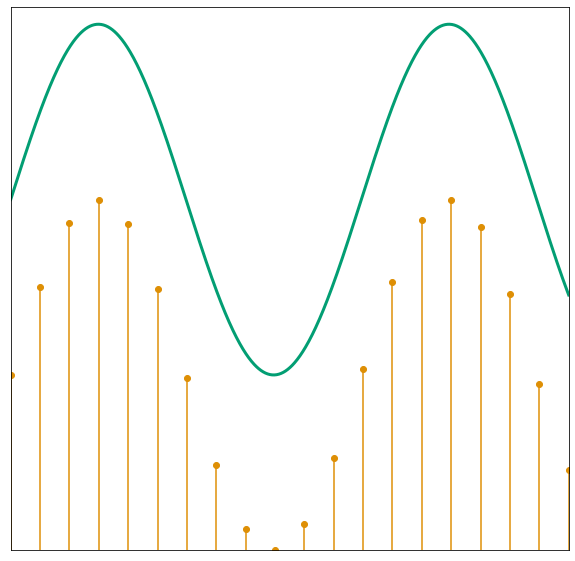

In [1]:
%reset -f
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=3,color=colour_palette[2],linestyle='-')
t_discrete = np.linspace(0,10,20)
s_discrete = np.sin(t_discrete)+1
plt.scatter(t_discrete,s_discrete,color=colour_palette[1])
for td,sd in zip(t_discrete,s_discrete):
    plt.plot([td,td],[0,sd],color=colour_palette[1])
plt.xticks([])
plt.yticks([])
plt.xlim([0,10])
plt.ylim([0,3.1])
# plt.grid(True)
print()

# Essential Concepts


* A **sum**: \begin{equation} \sum_{n=0}^{M} f(nT) = f(0\times T) + f(1\times T) + ... + f(M \times T)\end{equation}
    
* An **integral**: \begin{equation} \int_{-\pi}^{\pi} f(t) dt \end{equation} 


    
    
 

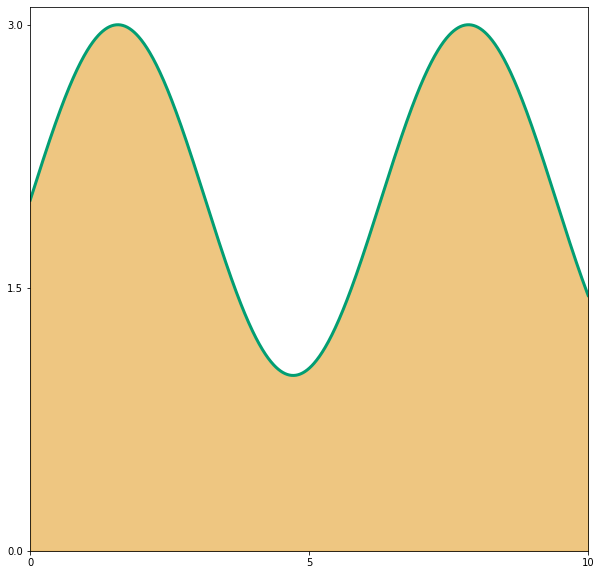

In [2]:
%reset -f
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=3,color=colour_palette[2],linestyle='-')
plt.fill_between(t,0,s,alpha=0.5,color=colour_palette[1])
plt.xticks([0,5,10])
plt.yticks([0,1.5,3])
plt.xlim([0,10])
plt.ylim([0,3.1])
# plt.grid(True)
print()

$$f(t) = sin(t) + 2$$

The integral: $$\int_0^{10} f(t) dt $$
is just the area under this curve. We can also approximate this by a sum: 


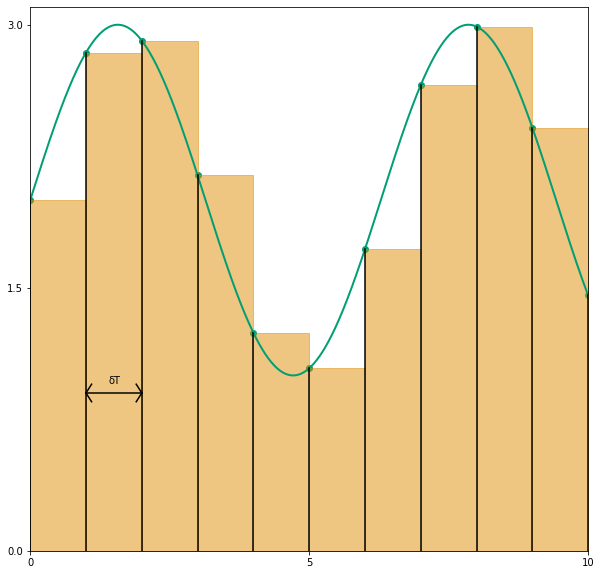

In [51]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=2,color=colour_palette[2],linestyle='-')
t_points = np.linspace(0,10,11)
s_points = np.sin(t_points)+2
plt.scatter(t_points,s_points,color=colour_palette[2])
for (x,y) in zip(t_points,s_points):
    plt.plot([x,x],[0,y],color='black')
    plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

plt.xticks([0,5,10])
plt.yticks([0,1.5,3])
plt.xlim([0,10])
plt.ylim([0,3.1])
plt.annotate(s='δT', xy=(1.4,0.95))
plt.plot([1,2],[0.9,0.9],color="black")
plt.plot([1,1.1],[0.9,0.85],color="black")
plt.plot([1,1.1],[0.9,0.95],color="black")
plt.plot([2.0,1.9],[0.9,0.85],color="black")
plt.plot([2.0,1.9],[0.9,0.95],color="black")
# plt.grid(True)
print()

\begin{equation}  \sum_{n} f(n \delta T) \delta T   \end{equation} 


* A **sum** which (**under some conditions**) _converges_ to an **integral**<sup>1</sup>: \begin{equation} \lim_{\delta T \to 0}( \sum_{n} f(n \delta T) \delta T ) = \int f(t) dt \end{equation} 


(as drawn, $\delta T =1$) 
$$\sum_{n=0}^{10} 1 \times f(n \times 1) $$

Now, intuitively it seems that as $\delta T \to 0$, we get a better estimate of the area: when we get to an infinitesimal $\delta T$, we obtain the integral. 


 
<sup>1</sup>This is a Riemann integral. Thankfully this is all most of us will ever need...

## Sine of the times?
$$f(t) = sin(t)$$
$$g(t) = sin(2t)$$
$$h(t) = cos(t)$$

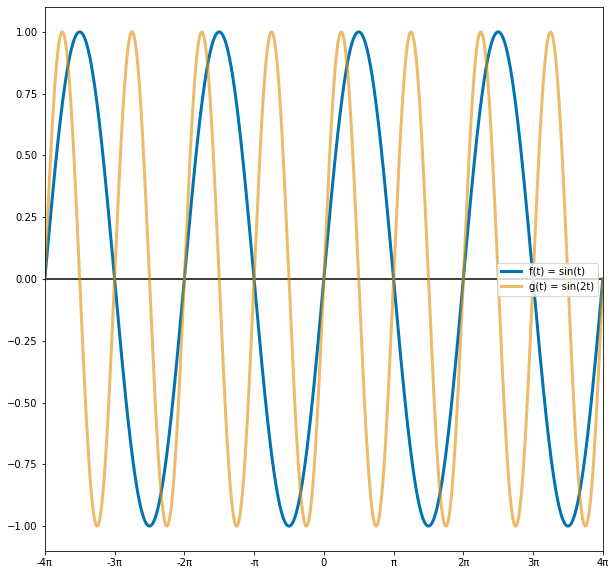

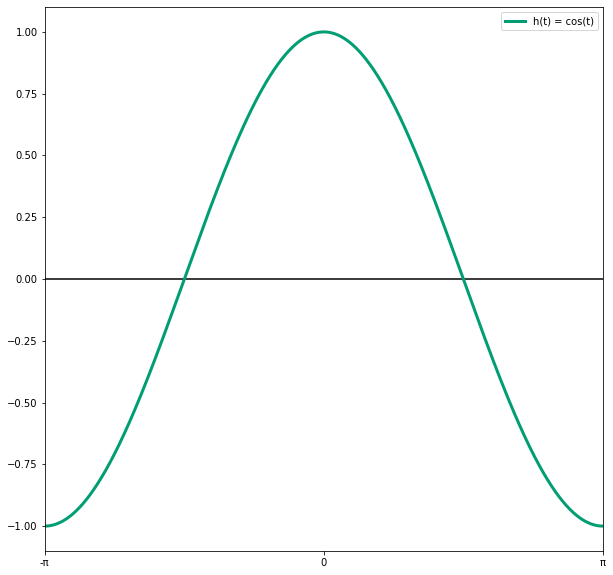

In [4]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(-np.pi*4,4*np.pi,2000)
f = np.sin(t) 
g = np.cos(t)
h = np.sin(2*t)
plt.plot([-100,100],[0,0],color="black")
plt.plot(t,f,color=colour_palette[0],label="f(t) = sin(t)",lw=3)
# plt.plot(t,g,color=colour_palette[2],label="g(t) = cos(t)",lw=3)
plt.plot(t,h,color=colour_palette[1],label="g(t) = sin(2t)",lw=3,alpha=0.6)
# plt.xticks([0,5,10])
# plt.yticks([0,1.5,3])
x_lim_space = np.linspace(-4,4,9)
plt.xlim([-2*np.pi,2*np.pi])
plt.xticks(x_lim_space*np.pi,labels=["-4π","-3π","-2π","-π",0,"π","2π","3π","4π"])
# plt.ylim([0,3.1])
# plt.grid(True)
plt.legend()

plt.figure()

t = np.linspace(-np.pi,np.pi,2000)
f = np.sin(t) 
g = np.cos(t)
h = np.sin(2*t)
plt.plot([-100,100],[0,0],color="black")
# plt.plot(t,f,color=colour_palette[0],label="f(t) = sin(t)",lw=3)
plt.plot(t,g,color=colour_palette[2],label="h(t) = cos(t)",lw=3)
# plt.plot(t,h,color=colour_palette[1],label="g(t) = sin(2t)",lw=3)
# plt.xticks([0,5,10])
# plt.yticks([0,1.5,3])
plt.xlim([-np.pi,np.pi])
plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
# plt.ylim([0,3.1])
# plt.grid(True)
plt.legend()
print()

Since the period of $sin(t)$ is $2 \pi$, a sine wave at a given frequency $k \ \rm{Hz}$ would be $sin(2 \pi k t)$.

A sine wave at $k = 100 \rm{Hz}$ would be $sin(100 \times 2\pi \times t)$ where $t$ is in seconds.

# Waterfalls & Hotplates


* Probably all have heard of the Fourier Transform and seen a waterfall display like this; do you know why it works? 
<center>
<img src="GEO_MFSK22.png" />
<img src="ET_20m.png" width=800px />
</center>

(images from George M1GEO and John M5ET respectively)



* A common goal in computing the Fourier **transform** is to determine how much energy/signal there is at a given frequency. We will fudge our way into this by starting from the basics...

# Towards Fourier Space

* May have seen a Maclaurin or Taylor series for approximating a function: 
$$f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + ...$$


* How might we represent a *periodic function*? We might try <sup>1</sup> 

$$ f(t) \approx c + a_1 sin(t) + b_1 cos(t) + a_2 sin(2t) + b_2 cos(2t) + ... $$ 

<sup>1</sup> Advanced students should explain to their neighbours in the next break why we need both sine and cosine terms here.

This is a _Fourier Series_. How do we find $a_i$ and $b_i$? __Orthogonality of sines__

## Orthogonality of Sines

In [52]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[10,10]
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,2)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.sin(x)
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
    plt.plot([-100,100],[0,0],color='black')
    y_2 = np.sin(m*x)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    product = y_1 * y_2
    
    plt.plot(x,product,color=colour_palette[2],lw=3.0)
    plt.fill_between(x,0,product,color=colour_palette[2],lw=3.0)
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,10,1))

# mpld3.display(fig)
print()


interactive(children=(IntSlider(value=5, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

\begin{equation}\int_{-\pi}^\pi sin(n t) sin(m t) dt = \begin{cases} 
\pi & \forall \ n = m : n \in \mathbb{Z}\\
0 & n \neq m
\end{cases}\end{equation}
(and the same is true for cos, I promise!)
\begin{equation}\int_{-\pi}^\pi sin(\omega_1 x) cos(\omega_2 x) dx = 0 \ \forall  \omega_1,\omega_2 \in \mathbb{Z} \end{equation}

* In essence this is a **filter**

* Why does this help us?
Remember we represented our function as a sum of sines and cosines with some coefficients $a_i$ and $b_i$; now we can find those coefficients!

$$ f(t) \approx c + a_1 sin(t) + b_1 cos(t) + a_2 sin(2t) + b_2 cos(2t) + ... $$ 
$$ a_n = \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(n t) dt $$
$$ b_n = \frac{1}{\pi} \int_{-\pi}^\pi f(t) cos(n t) dt $$

(plus a DC offset...)

\begin{equation} c = \frac{1}{2\pi}\int_{-\pi}^{\pi} f(t) dt \end{equation}



## An example: the square wave


* This is a carefully chosen example: why?
* Formally: $f(t) = \begin{cases}
-1 & -\pi < t < 0 \\
\hspace{0.6em} 1 & \hspace{0.6em}  0 \leq t < \pi
\end{cases}$


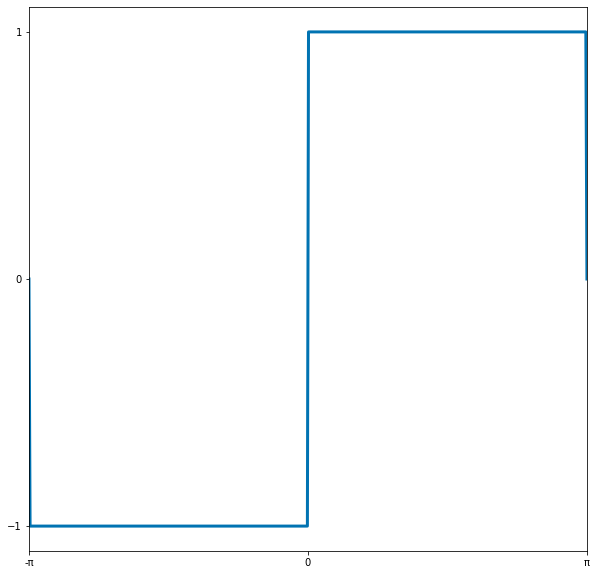

In [6]:

import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns


colour_palette = sns.color_palette("colorblind",3)

x = np.linspace(-np.pi,np.pi,500)

plt.xlim(-np.pi,np.pi)

plt.yticks([-1,0,1])
plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
y_1 = np.where(x<0,-1.0,1.0)
y_1[0] = 0
y_1[-1]=0
plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
print()

* Chosen as it needs a sine series only: there is __no__ DC offset and __no__ cosine term. (those advanced students can discuss this later too)



## Calculating the coefficients


$$a_1 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(t) dt + \int_{0}^\pi 1 sin(t) dt \right] = \frac{4}{\pi}$$

In [1]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.where(x<0,-1.0,1.0)
    y_1[0] = 0
    y_1[-1]=0
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
#     plt.plot([-100,100],[0,0],color='black')
    y_2 = np.sin(m*x)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    product = y_1 * y_2
    
    plt.plot(x,product,color=colour_palette[2],lw=3.0)
    plt.fill_between(x,0,product,color=colour_palette[2],lw=3.0)
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,10,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=5, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

$$a_2 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(2t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(2t) dt + \int_{0}^\pi 1 sin(2t) dt \right] = 0$$


$$a_3 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(3t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(3t) dt + \int_{0}^\pi 1 sin(3t) dt \right] = \frac{4}{3\pi}$$


(...many hours later...)

Instead of working out each term, we could find a general expression:
(an identity that makes it much easier!)
$$ \int_a^b sin(nt) dt = -\frac{1}{n} \left[cos(nt)\right]^b_a$$
$$cos(n \pi) = \begin{cases}
 1 & \text{even} \ n \\
-1 & \text{odd}\  n
\end{cases}$$

Skipping some algebra (if you enjoy that sort of thing, fair enough...), it turns out that:

$$a_n = \begin{cases}
0 & \text{even n}\\
\frac{4}{n \pi} & \text{odd n}
\end{cases}
$$

So the Fourier Series for the square wave is $$f(t) =\sum_{\rm{All\ odd\ n}} \frac{4}{n\pi} sin(n t)$$

The following graphic illustrates this for a finite number $m$ of sines...


In [2]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.where(x<0,-1.0,1.0)
    y_1[0] = 0
    y_1[-1]=0
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
#     plt.plot([-100,100],[0,0],color='black')
    bases = np.linspace(1,m,m)
    
    sin_coefficients = np.where(bases%2==0,0,4 /(bases*np.pi)) 
    sinusoids = np.sin(x*np.reshape(bases,(-1,1)))
    y_2 = np.sum(np.reshape(sin_coefficients,(-1,1))*sinusoids,axis=0)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,31,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=16, description='m', max=31, min=1), Output()), _dom_classes=('widget-in…

_The ringing around the transitions in this graphic is referred to as the Gibbs Phenomenon._

* In practice, Fourier techniques use complex exponentials combining sine and cosine in one term. Easier to integrate and more compact: $e^{i \theta} = cos(\theta) + i sin(\theta)$ (Euler's Formula). This necessitates 


* For discrete signals, we pretend the signal is periodic; calculating the Fourier series is then referred to as the "discrete Fourier transform".

* With a continuous signal, the sum becomes an integral and the spectrum becomes a continuous function in its own right.
* Taking the Fourier transform of a function is denoted $\mathcal{F}\left[f(t)\right]$
* The inverse Fourier transform is denoted $\mathcal{F}^{-1}\left[\tilde{F}(k)\right]$

# Frequency & Time Domains

### What does the "frequency domain"/"time domain" mean?
* The Fourier Transform provides a direct mapping between the frequency and time domains.
* Both represent a signal completely.
* The Fourier transform is **not** quite what you see on a waterfall: it covers the **whole** signal.

Some examples:




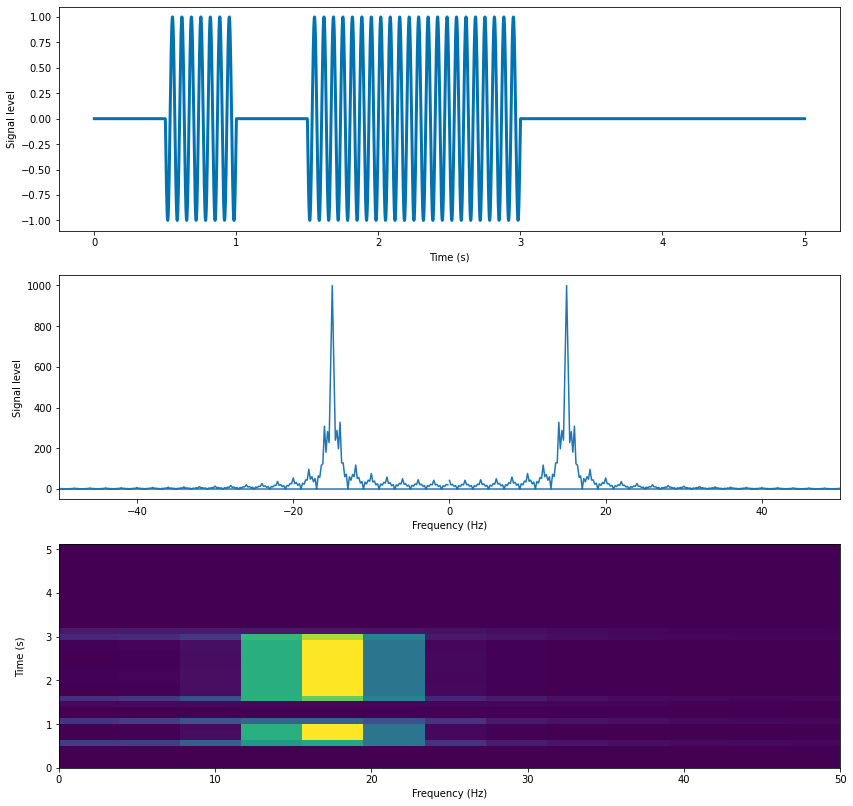

In [23]:

import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns


import scipy
import scipy.signal

fig,(ax1,ax2,ax3) = plt.subplots(3,1)
colour_palette = sns.color_palette("colorblind",3)
plt.subplots_adjust(hspace=0.2)
x = np.linspace(0,5,5000)
y = [0]*len(x)
y = np.sin(15*np.pi*2*x)
y = np.where(((x>1.5) & (x<3.0)) | ((x>0.5) & (x<1.0)),y,0)

# h = scipy.signal.firwin(50,55,fs=1000)
# y=np.convolve(y,h)
ax1.plot(x,y[0:len(x)],color=colour_palette[0],lw=3.0)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Signal level")
ax2.plot(np.fft.fftfreq(len(y),0.001),np.abs(np.fft.fft(y)))
ax2.set_ylabel("Signal level")
ax2.set_xlim(-50,50)
ax2.set_xlabel("Frequency (Hz)")

f,t,zxx = scipy.signal.stft(y,fs=1000)
ax3.pcolormesh(f,t, np.abs(zxx.transpose()))
ax3.set_ylabel("Time (s)",labelpad=20)
ax3.set_xlabel("Frequency (Hz)")
ax3.set_xlim(0,50)
print()

# Recap
* An integral is the area under a curve between two points, $\int_a^b f(t) dt$


* The area under the product of two sinusoids at integer frequencies is zero unless they are at the same frequency (integrating over an integer number of periods).
* Thus we can measure the "amount" of a function at a given frequency. 
* From this we derived the idea of a Fourier series: represent a periodic signal as a sum of content at the harmonic frequencies.
* We hacked the Fourier Series into a transform operation that works for all signals
* The Fourier Transform maps from the **time domain** into the **frequency domain** and has an inverse which goes the other way.


* Given the tools of the Fourier Series & the Fourier Transform, one can prove that sampling a signal "at an adequate frequency" loses no information...sadly we haven't time.



# Sampling Theorem

* Consider a continuous signal $f(t)$ such that the bandwidth of the signal is $W$
* We want to obtain a digital representation by sampling it at discrete intervals, say every $T$ seconds. 
* Nyquist's Theorem/the Sampling Theorem/the Shannon-Whittaker-Nyquist-Kotelnikov Sampling Theorem...: we don't lose anything if we chose $T < \frac{1}{2W}$. 


* (or equivalently the **sampling frequency** $f_s > 2W$

In [3]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np
import scipy.signal
colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(fs):
    m=fs
    plt.cla()
    freq = 1*2*np.pi
    offset = 2
    x_samples = np.arange(0,10,(1/m))
    x = np.linspace(0,10,1000)
    plt.plot(x,np.sin(freq*x)+offset,color=colour_palette[0],alpha=0.4,linestyle="-")
    plt.scatter(x_samples,np.sin(freq*x_samples)+offset,color="black",s=300) #weight?
    plt.ylim([0,3])
    plt.plot(x_samples,np.sin(freq*x_samples)+offset,color=colour_palette[1],alpha=0.7,lw=2)
#     for xi in x_samples:
#         plt.plot([xi,xi],[0,np.sin(freq*xi)+offset],color="black")
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,fs=(0.1,4.5,0.1))

# mpld3.display(fig)
print()

interactive(children=(FloatSlider(value=2.3000000000000003, description='fs', max=4.5, min=0.1), Output()), _d…

## Anti-Aliasing & Reconstruction Filters

* The Sampling Theorem suggests two constraints: one at the ADC, one at the DAC.

* ADC input signal must be band-limited: an "anti-aliasing" filter is required on the input. 
    * Filters aren't perfect: need wider bandwidth to allow for rolloff.
    * N.B. (advanced note) The criteria is that the **bandwidth** is limited, not that the **frequency** is limited: oversampling.
    

* DAC output signal must be band-limited: a "reconstruction filter" is used. 


<center><img src="SDR_block_diagram.jpg"/></center>

# Filtering in DSP
* Consider a band-pass filter (e.g. filtering only one CW signal out from the mix...)

* Ideally we would:
    * exclude all frequencies outside $(-W, W)$ 
    * have gain 1 for frequencies in $(-W,W)$
    
* Practical filters can't do this.


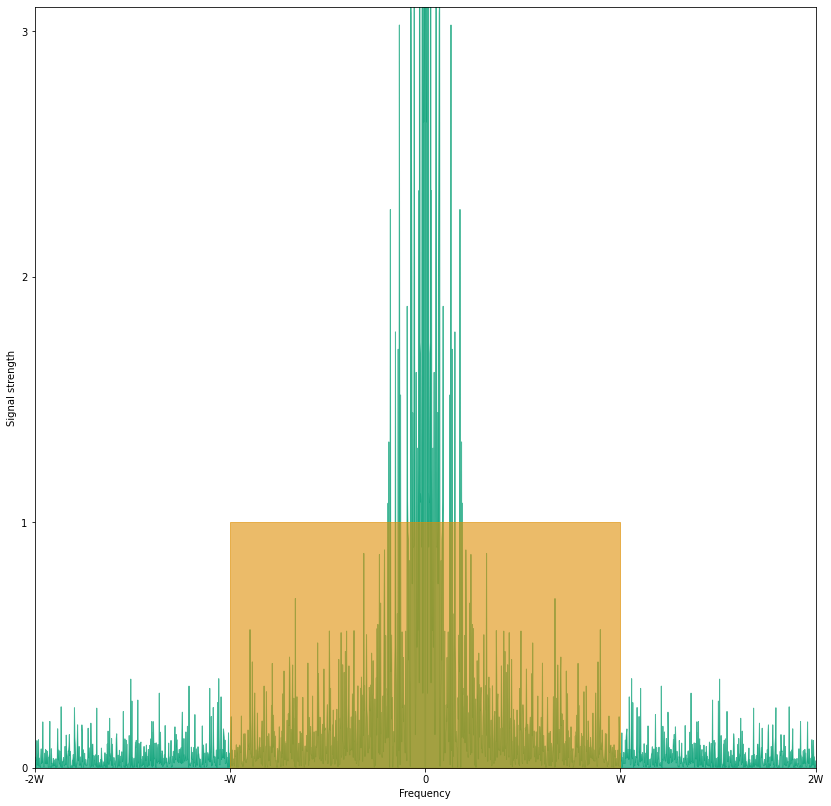

In [11]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,20,1000)
s = np.random.pareto( 40,1000)*30*(1/t)

plt.fill_between(t,0,s,alpha=0.7,color=colour_palette[2])
plt.fill_between(-t,0,s,alpha=0.7,color=colour_palette[2])

plt.fill_between([-10,10],0,[1,1],alpha=0.6,color=colour_palette[1])

# plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

plt.xticks([-20,-10,0,10,20],["-2W","-W","0","W","2W"])
plt.xlim([-20,20])
plt.yticks([0,1,2,3])
plt.ylim([0,3.1])
plt.xlabel("Frequency")
plt.ylabel("Signal strength")
# plt.grid(True)
print()

# Acting on Impulse

<img src="fireworks.jpeg" width=1080px/>

## How Much Smoke?
(explanation due with thanks and deference to Prof. Tom Hynes). 
* Determine how much smoke is in the air at a given moment
* Measure one firework...

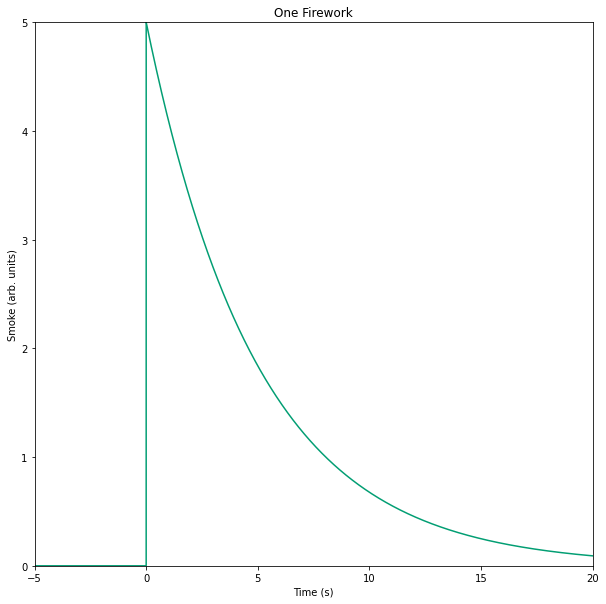

In [12]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,20,2000)
s = 5*np.exp(-0.2*t)
plt.plot(t,s,color=colour_palette[2])
plt.plot([-5,0,0.001],[0,0,5],color=colour_palette[2])
#plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])
plt.ylabel("Smoke (arb. units)")
plt.xlabel("Time (s)")
plt.xticks([-5,-0,5,10,15,20])
plt.xlim([-5,20])
plt.ylim([0,5])
plt.title("One Firework")
# plt.grid(True)
print()

## Impulse Responses and Convolution
* Here, the impulse is delivered by detonation of the firework; the smoke decays away over time afterwards. 
* We calculate the total volume of smoke $f(t)$ by summing up all the smoke left in the air from previous firework detonations
* Let us say the fireworks go off at times $t=1,2,3...$ in quantity $g(t)$. 

* Don't be confused: two variables, $\tau$ and $t$!!!



<img src="t_shirt.jpg"/>
<p style="font-size:8px">Based on https://commons.wikimedia.org/wiki/File:Flag_of_Greece.png by user 
    Chantel</p>

$$ f(t) = \sum_{\tau =0} \left[ h(t - \tau) g(\tau) \right]$$
* "play back" h(t) each time a firework goes off, and sum up the smoke from **all** the fireworks that have gone off to date


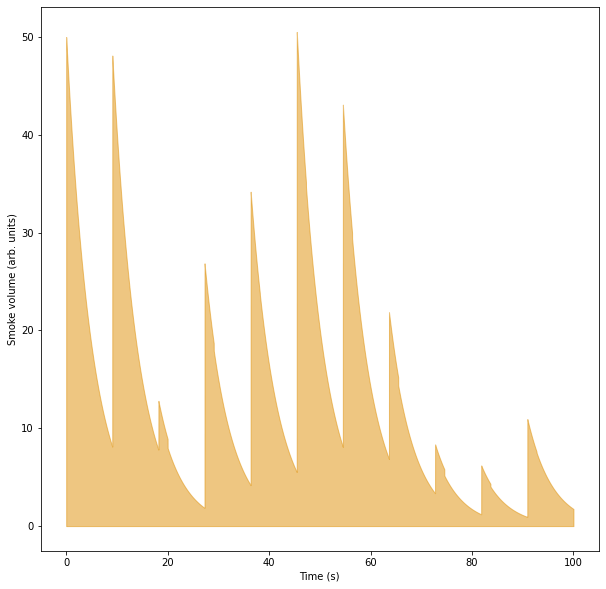

In [13]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.rcParams['figure.figsize']=[10,10]
N_POINTS = 11
counts = np.around(np.random.rand(N_POINTS)*10)
times = np.linspace(0,100,N_POINTS)

SPACED_POINTS = 10000
full_timebase = np.linspace(0,100,SPACED_POINTS)
plt.figure()
padded_detonations = np.zeros(SPACED_POINTS)
for time,val in enumerate(counts):
    padded_detonations[int(time*SPACED_POINTS/N_POINTS)] = val

t = np.linspace(0,20,2000)
s = 5*np.exp(-0.2*t)
smoke = np.convolve(padded_detonations,s)
# plt.plot(full_timebase,padded_detonations,colour_palette[0])
plt.fill_between(full_timebase,0,smoke[0:SPACED_POINTS],color=colour_palette[1],alpha=0.5)
plt.ylabel("Smoke volume (arb. units)")
plt.xlabel("Time (s)")
print()

$$f(13) = g(0) \times h(13) \\+ g(10) \times h(3) \\+ g(20) \times  h(-7) \\+ ...$$


...wait...$h(-7)$?
* Causal vs non-causal impulse responses

## Reflections on convolution


* $g(t)$ (the stimulus) can be **anything** (well almost)

* Not all systems can be modelled like this: examples?
    

* Several:

    * Magnetics
    * Diodes (sometimes)
    * Transistors (sometimes)
    * Wires????
* System must be linear (so adding up works) and time-invariant (so $h(t)$ is constant).

## Final Useful Property of Convolution
$$\mathcal{F}\left[f(t) * g(t)\right] = \mathcal{F}[f(t)] \times \mathcal{F}[g(t)]$$

* The Fourier transform of the convolution of two functions is equal to the **product** of the Fourier transform of each of the functions


_Convolution in the time domain is multiplication in the frequency domain and vice versa_

# Why We Bothered

* This all started when we wanted to filter a signal digitally: 

* We want to **remove** all signal at frequencies $f : |f| \geq W$
* i.e. multiply by 
$$ \tilde{H}(k) = \begin{cases}
0 & |k| \geq W \\
1 & |k| < W
\end{cases}$$


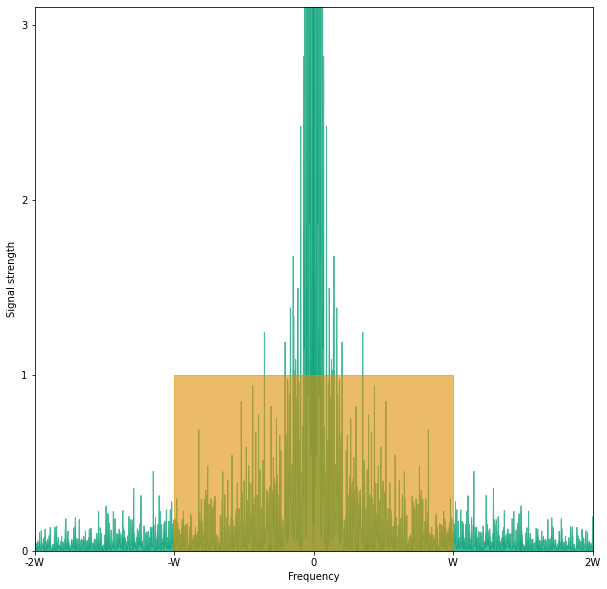

In [14]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,20,1000)
s = np.random.pareto( 40,1000)*30*(1/t)

plt.fill_between(t,0,s,alpha=0.7,color=colour_palette[2])
plt.fill_between(-t,0,s,alpha=0.7,color=colour_palette[2])

plt.fill_between([-10,10],0,[1,1],alpha=0.6,color=colour_palette[1])

# plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

plt.xticks([-20,-10,0,10,20],["-2W","-W","0","W","2W"])
plt.xlim([-20,20])
plt.yticks([0,1,2,3])
plt.ylim([0,3.1])
plt.xlabel("Frequency")
plt.ylabel("Signal strength")
# plt.grid(True)
print()

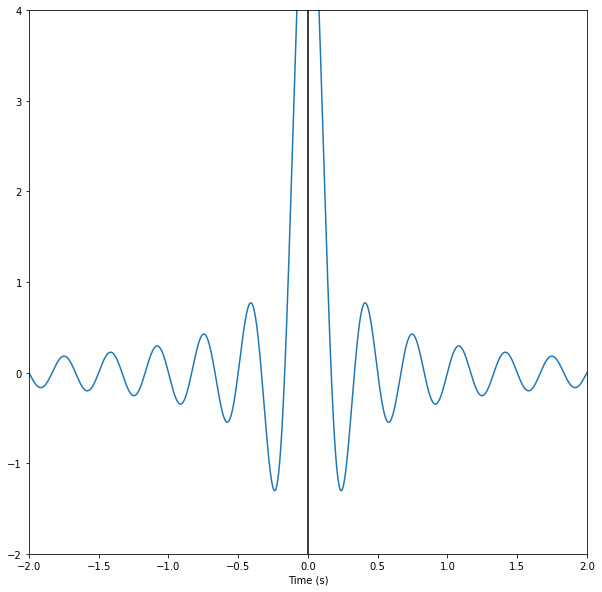

In [15]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(-2,2,1000)


# plt.plot([-20,-10.01,-10,10,10.01,20],[0,0,1,1,0,0],color=colour_palette[1])
h = np.sin(2 * np.pi * t * 3)/(np.pi * t)
plt.plot(t,h)
plt.xlabel("Time (s)")
plt.xlim(-2,2)
plt.ylim(-2,4)
plt.autoscale(False)
plt.plot([0,0],[-1000,1000],color="black")

#plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

# plt.grid(True)
print()

Conveniently, it turns out that the inverse Fourier transform of our "top hat" is a "sinc": 

$$h(t) = \frac{1}{\pi t} \times sin(2 \pi W t)$$

This is the impulse response of a filter with this property! Hurray!

* In order to get the same effect as cutting off the spectrum outside $(-W,W)$, just convolve with $h(t)$.


### Always a snag
* Non-causal 
* Infinite

## Practical Solutions
* Shift & truncate h(t)
* Truncating leads to some issues...


In [16]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.where(x<0,-1.0,1.0)
    y_1[0] = 0
    y_1[-1]=0
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
#     plt.plot([-100,100],[0,0],color='black')
    bases = np.linspace(1,m,m)
    
    sin_coefficients = np.where(bases%2==0,0,4 /(bases*np.pi)) 
    sinusoids = np.sin(x*np.reshape(bases,(-1,1)))
    y_2 = np.sum(np.reshape(sin_coefficients,(-1,1))*sinusoids,axis=0)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,21,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=11, description='m', max=21, min=1), Output()), _dom_classes=('widget-in…

# Digital Filters
* Not a practical talk: tools for playing around include GNURadio, scipy.signal
* Digital filters just apply the above property: use an impulse response in the time domain to process the signal
* FIR: **F**inite **I**mpulse **R**esponse. Simple, but often expensive.
* IIR: **I**nfinite **I**mpulse **R**esponse. Complex and more computationally efficient, but potentially explosive...feedback!


* We've now come full circle: sample a signal, filter it, and generate the spectrum should you so desire
* FIR with "5 taps" (i.e. 5 sample long impulse response)

<center>
    <img src="FIR2.jpg"/>
    </center>

In [17]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

import scipy
import scipy.signal

colour_palette = sns.color_palette("colorblind",3)
fs = 1000 
f_fund = 25
time_end = 0.5

fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
    plt.cla()
    t = np.linspace(0.0,time_end,np.int(fs*time_end))
    y = np.where((np.trunc(t*f_fund*2*np.pi)%2==0),-1,1)*0.2
    h = scipy.signal.firwin(m,30,fs=fs)
    y_filt = np.convolve(y,h) +0.4
    plt.plot(t,y,color=colour_palette[0])
    plt.plot(t,y_filt[:len(t)],color=colour_palette[1])
    plt.yticks([])
    plt.plot(t,np.sin(2*np.pi*f_fund*t)*0.1+0.6,color=colour_palette[2])
    plt.xlabel("Time (s)")
    mpld3.display(fig,closefig=True)

m = 2

# fig,ax = plt.subplots(1,1)

update_m_value(5)

#add slider for m


interact(update_m_value,m=(1,500,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=250, description='m', max=500, min=1), Output()), _dom_classes=('widget-…

In [18]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

import scipy
import scipy.signal

colour_palette = sns.color_palette("colorblind",3)
fs = 1000 
f_fund = 25
time_end = 0.5

fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
    plt.cla()
    h = scipy.signal.firwin(m,30,fs=fs)
    plt.plot(np.linspace(0,fs/2,np.int(len(h)/2)),np.abs(np.fft.fft(h))[:np.int(len(h)/2)],color=colour_palette[0])
    plt.xlim(0,150)
    plt.yticks([])
    plt.xlabel("Frequency (Hz)")
#     plt.fill_between(np.fft.fftfreq(len(h),1.0/fs),0,np.abs(np.fft.fft(h)))
    mpld3.display(fig,closefig=True)

m = 2

# fig,ax = plt.subplots(1,1)

update_m_value(5)

#add slider for m


interact(update_m_value,m=(1,500,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=250, description='m', max=500, min=1), Output()), _dom_classes=('widget-…

# The End
* Sample a signal at $f_s > 2W$: we can reproduce it
* Given a signal, we can take the Fourier transform & find out about the frequency content
* LTI systems represented by their impulse response
* Convolution in time domain = multiplication in frequency domain and vice-versa
* Use this to filter a digital signal

## Questions to m0+rsgb2020@wje.io
(please try Google first!)